<a href="https://colab.research.google.com/github/Flaviagerhardt/projeto_pln_infnet/blob/main/projeto_linguagem_natural_python_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baixe os dados

Instalar o gerenciador kaggle no ambiente do Colab e faça o upload do arquivo kaggle.json

In [1]:
!pip install -q kaggle
!rm -rf kaggle.json
from google.colab import files


# Fazer upload do arquivo kaggle.json para acessar a API do Kaggle
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"flaviagerhardt","key":"0e62cbfc72f22af495fde9096b180cf0"}'}

Criar a pasta .kaggle

In [2]:
# Configurar o Kaggle para uso no Colab

!rm -rf .kaggle
!mkdir .kaggle
!cp kaggle.json .kaggle/
!chmod 600 .kaggle/kaggle.json

Baixar o dataset

In [3]:
!kaggle datasets download --force -d marlesson/news-of-the-site-folhauol

Dataset URL: https://www.kaggle.com/datasets/marlesson/news-of-the-site-folhauol
License(s): CC0-1.0
 98% 183M/187M [00:02<00:00, 105MB/s]
100% 187M/187M [00:02<00:00, 67.1MB/s]


# Criar o DataFrame com os dados lidos diretamente da plataforma Kaggle

In [4]:
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()


df = pd.read_csv("news-of-the-site-folhauol.zip")

In [5]:
# Exibir as primeiras linhas do DataFrame
print(df.head())


                                               title  \
0  Lula diz que está 'lascado', mas que ainda tem...   
1  'Decidi ser escrava das mulheres que sofrem', ...   
2  Três reportagens da Folha ganham Prêmio Petrob...   
3  Filme 'Star Wars: Os Últimos Jedi' ganha trail...   
4  CBSS inicia acordos com fintechs e quer 30% do...   

                                                text        date   category  \
0  Com a possibilidade de uma condenação impedir ...  2017-09-10      poder   
1  Para Oumou Sangaré, cantora e ativista malines...  2017-09-10  ilustrada   
2  Três reportagens da Folha foram vencedoras do ...  2017-09-10      poder   
3  A Disney divulgou na noite desta segunda-feira...  2017-09-10  ilustrada   
4  O CBSS, banco da holding Elopar dos sócios Bra...  2017-09-10    mercado   

  subcategory                                               link  
0         NaN  http://www1.folha.uol.com.br/poder/2017/10/192...  
1         NaN  http://www1.folha.uol.com.br/ilustrada/

# Filtrando os dados para utilizar apenas as notícias do ano de 2016 e da categoria "Mercado"

Filtre os dados do DataFrame df e crie um DataFrame news_2016 que contenha apenas notícias de 2016 e da categoria mercado.

In [6]:
# Converter a coluna de datas para o formato datetime
# Estava dando um erro de dataframe vazio quando rodava o codigo e precisei fazer uma verificação quando realizava o filtro, por isso, inseri algumas linhas
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print("Verificar tipos de dados após conversão:")
print(df.dtypes)

Verificar tipos de dados após conversão:
title                  object
text                   object
date           datetime64[ns]
category               object
subcategory            object
link                   object
dtype: object


In [7]:
# Filtrar os dados para utilizar apenas as notícias do ano de 2016 e da categoria "Mercado"
news_2016 = df[(df['date'].dt.year == 2016) & (df['category'] == 'mercado')]
print("Dados filtrados (2016, Mercado):")
print(news_2016.head())

# Verificar a quantidade de notícias no dataframe news_2016
num_noticias = len(news_2016)
print(f"Quantidade de notícias em news_2016: {num_noticias}")

Dados filtrados (2016, Mercado):
                                                   title  \
34207  Fazendeira cria própria rede de banda larga e ...   
34238  Alteração na cobrança do ICMS eleva conta de c...   
34245  Ajustes sobre servidores públicos emperram nos...   
34248  Inventor da internet das coisas ataca mitos so...   
34249  Livro analisa empresas de crescimento exponenc...   

                                                    text       date category  \
34207  "Sou apenas a mulher de um fazendeiro", diz Ch... 2016-12-31  mercado   
34238  A conta do celular pós-pago ou controle ficará... 2016-12-31  mercado   
34245  A maior parte dos projetos de ajuste das conta... 2016-12-31  mercado   
34248  Desde as primeiras décadas do século 19 se diz... 2016-12-31  mercado   
34249  O Cifras & Letras seleciona semanalmente lança... 2016-12-31  mercado   

      subcategory                                               link  
34207         NaN  http://www1.folha.uol.com.br/mercad

In [8]:
# Verificar se os dados filtrados não estão vazios
if news_2016.empty:
    print("Nenhum dado encontrado para o ano de 2016 na categoria 'Mercado'. Verifique os filtros aplicados.")

# Instalação de Pacotes e Configuração

Estava apresentando erro quando rodavao código por causa das dependencias por isso tive que centralizar as instalações e importações

## Carregar os módulos usados ao longo desse notebook

In [12]:
!pip uninstall pyLDAvis
!pip install --upgrade git+https://github.com/bmabey/pyLDAvis.git

  Cloning https://github.com/bmabey/pyLDAvis.git to /tmp/pip-req-build-czaaljoc
  Running command git clone --filter=blob:none --quiet https://github.com/bmabey/pyLDAvis.git /tmp/pip-req-build-czaaljoc
  Resolved https://github.com/bmabey/pyLDAvis.git to commit 728a3608d2438d7ec5ed1f49a34c481b1402de43
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.4.1-py3-none-any.whl size=137148 sha256=8be657c035d6557402d64a6b05be5e5cfdc5e501fde4aa7166f8c6d6f816ae33
  Stored in directory: /tmp/pip-ephem-wheel-cache-kpunxnnj/wheels/2c/2b/b1/959e37847190fa8a36c8484dc842cddd943e6c310e089263cb
Successfully built pyLDAvis


In [14]:
# Instalar pacotes necessários
!pip install -q kaggle spacy pyldavis==3.2.2
!python -m spacy download pt_core_news_lg

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 2.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [15]:
import nltk
import pandas as pd
from tqdm.auto import tqdm
import zipfile
from google.colab import files
import spacy
from spacy.lang.pt.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np
import pyLDAvis
import pyLDAvis.sklearn
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain
from typing import List, Set

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Instalar os datasets stopwords, punkt e rslp do nltk

In [16]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

## Atualizar o SPACY e instalar os modelos pt_core_news_lg

In [17]:
!pip install -q spacy
!python -m spacy download pt_core_news_lg

import spacy
from spacy.lang.pt.stop_words import STOP_WORDS

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 731.7 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# NLTK Tokenizer and Stemmer

NLTK Tokenizer and Stemmer
Crie uma coluna no dataframe news_2016 contendo os tokens para cada um dos textos. Os tokens devem estar representados pelo radical das palavras (stem). Para tal, complete o conteúdo da função tokenize.

In [18]:
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer

def tokenize(text: str) -> List:
    tokens = word_tokenize(text, language='portuguese')
    stemmer = nltk.stem.RSLPStemmer()
    return [stemmer.stem(token) for token in tokens if token.isalpha()]

news_2016['nltk_tokens'] = news_2016['text'].progress_map(tokenize)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/7943 [00:00<?, ?it/s]

<ipython-input-18-301d07d397ee>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_2016['nltk_tokens'] = news_2016['text'].progress_map(tokenize)


# Criar uma documento SPACY para cada texto do dataset

Crie uma coluna spacy_doc que contenha os objetos spacy para cada texto do dataset de interesse. Para tal, carregue os modelos pt_core_news_lg e aplique em todos os textos (pode demorar alguns minutos...)

In [19]:
nlp = spacy.load("pt_core_news_lg")
news_2016['spacy_doc'] = news_2016['text'].progress_map(nlp)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/7943 [00:00<?, ?it/s]

<ipython-input-19-64c55693bc28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_2016['spacy_doc'] = news_2016['text'].progress_map(nlp)


# Realize a Lematização usando SPACY

O modelo NLP do spacy oferece a possiblidade de lematizar textos em português (o que não acontece com a biblioteca NLTK). Iremos criar uma lista de tokens lematizados para cada texto do nosso dataset. Para tal, iremos retirar as stopwords, usando uma função que junta stopwords provenientes do NLTK e do Spacy. Essa lista completa, é retornada pela função stopwords (e você não precisa mexer).

Já a função filter retorna True caso o token seja composto por caracters alfabéticos, não estiver dentro da lista de stopwords e o lemma resultante não estiver contido na lista o", "em", "em o", "em a" e "ano".

Crie uma coluna chamada spacy_lemma para armazenar o resultado desse pré-processamento.

In [20]:
def stopwords() -> Set:
    return set(nltk.corpus.stopwords.words("portuguese")).union(STOP_WORDS)

complete_stopwords = stopwords()

def filter_token(w: spacy.tokens.Token) -> bool:
    return w.is_alpha and w.lemma_.lower() not in complete_stopwords

def lemma(doc: spacy.tokens.Doc) -> List[str]:
    return [token.lemma_ for token in doc if filter_token(token)]

news_2016['spacy_lemma'] = news_2016['spacy_doc'].progress_map(lemma)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/7943 [00:00<?, ?it/s]

<ipython-input-20-c366c99ea5df>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_2016['spacy_lemma'] = news_2016['spacy_doc'].progress_map(lemma)


In [21]:
print(news_2016['spacy_lemma'].head())

34207    [mulher, fazendeiro, Christine, Conder, modést...
34238    [conta, de o, celular, controle, ficar, cara, ...
34245    [de o, projeto, ajuste, de o, conta, público, ...
34248    [década, de o, século, nota, ópera, sinfonia, ...
34249    [Cifras, Letras, selecionar, semanalmente, lan...
Name: spacy_lemma, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Reconhecimento de entidades nomeadas

Crie uma coluna spacy_ner que armazene todas as organizações (APENAS organizações) que estão contidas no texto.

In [22]:
def NER(doc: spacy.tokens.Doc):
    return [ent.text for ent in doc.ents if ent.label_ == 'ORG']

news_2016['spacy_ner'] = news_2016['spacy_doc'].progress_map(NER)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/7943 [00:00<?, ?it/s]

<ipython-input-22-d9669068b29f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_2016['spacy_ner'] = news_2016['spacy_doc'].progress_map(NER)


# Bag-of-Words

Crie uma coluna tfidf no dataframe news_2016. Use a coluna spacy_lemma como base para cálculo do TFIDF. O número máximo de features que iremos considerar é 5000. E o token, tem que ter aparecido pelo menos 10 vezes (min_df) nos documentos.

In [23]:
class Vectorizer:
    def __init__(self, doc_tokens: List):
        self.doc_tokens = doc_tokens
        self.vectorizer = TfidfVectorizer(max_features=5000, min_df=10)
        self.tfidf = None

    def vectorizer_fit(self):
        self.tfidf = self.vectorizer.fit_transform([' '.join(tokens) for tokens in self.doc_tokens])
        return self.tfidf

    def __call__(self):
        if self.tfidf is None:
            self.vectorizer_fit()
        return self.tfidf

doc_tokens = news_2016['spacy_lemma'].values.tolist()
vectorizer = Vectorizer(doc_tokens)
vectorizer()

def tokens2tfidf(tokens):
    tokens = ' '.join(tokens)
    array =  vectorizer.vectorizer.transform([tokens]).toarray()[0]
    return array

news_2016['tfidf'] = news_2016['spacy_lemma'].progress_map(tokens2tfidf)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/7943 [00:00<?, ?it/s]

<ipython-input-23-dca2b1e52fd1>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_2016['tfidf'] = news_2016['spacy_lemma'].progress_map(tokens2tfidf)


# Extração de Tópicos

Realize a extração de 9 tópicos usando a implementação do sklearn do algoritmo Latent Dirichlet Allocation. Como parâmetros, você irá usar o número máximo de iterações igual à 100 (pode demorar) e o random_seed igual a SEED que foi setado no início do notebook

In [24]:

N_TOPICS = 9
corpus = np.array(news_2016['tfidf'].tolist())
lda = LDA(n_components=N_TOPICS, max_iter=100, random_state=123)
lda.fit(corpus)
print("Tópicos extraídos com sucesso.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tópicos extraídos com sucesso.


# Visualize os tópicos usando a ferramenta pyLDAVis

In [26]:
from scipy.sparse import csr_matrix



corpus_sparse = csr_matrix(corpus)
pyLDAvis.enable_notebook()

def _get_vocab(vectorizer):
    return vectorizer.get_feature_names_out()

pyLDAvis.sklearn._get_vocab = _get_vocab

panel = pyLDAvis.sklearn.prepare(lda, corpus_sparse, vectorizer.vectorizer)
panel


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.016148  0.127790       1        1  37.112799
3     -0.005484  0.098553       2        1  28.019470
0      0.146911  0.153409       3        1  22.042970
5      0.264012 -0.149425       4        1   4.409326
4     -0.118313 -0.003456       5        1   2.544959
7     -0.109145 -0.040634       6        1   1.706057
2     -0.047793 -0.124429       7        1   1.701804
1     -0.079934 -0.036548       8        1   1.292244
8     -0.066403 -0.025261       9        1   1.170371, topic_info=            Term         Freq        Total Category  logprob  loglift
4989      índice   137.000000   137.000000  Default  30.0000  30.0000
1294          de  1825.000000  1825.000000  Default  29.0000  29.0000
1631       dólar   114.000000   114.000000  Default  28.0000  28.0000
1695          em   995.000000   995.000000  Default  27.0000  27.0000
597        bolsa    84.000000    84.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
3069   mergulhar     0.156145     3.815479   Topic9  -8.5406   1.2518
1376     desabar     0.156144     3.522050   Topic9  -8.5406   1.3318
2449        iene     0.156142    16.256134   Topic9  -8.5406  -0.1976
1074     consiga     0.156131     5.670538   Topic9  -8.5406   0.8555
1124  contrariar     0.156128     4.522854   Topic9  -8.5407   1.0816

[525 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1         5  0.835518      ab
11        5  0.858499   abear
12        8  0.874293  abecip
66        1  0.449939  acordo
66        2  0.370538  acordo
...     ...       ...     ...
4989      1  0.050996  índice
4989      2  0.021855  índice
4989      3  0.335118  índice
4989      4  0.269551  índice
4989      7  0.313262  índice

[1117 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 1, 6, 5, 8, 3, 2, 9])

# Atribua a cada text, um (e apenas um) tópic.

Crie uma coluna topic onde o valor é exatamente o tópico que melhor caracteriza o documento de acordo com o algoritmo de LDA.

In [27]:
# Atribuir a cada texto um tópico
def get_topic(tfidf: np.ndarray) -> int:
    return np.argmax(lda.transform(tfidf.reshape(1, -1)))

news_2016['topic'] = news_2016['tfidf'].progress_map(get_topic)
print("Tópicos atribuídos aos documentos:")
print(news_2016[['text', 'topic']].head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/7943 [00:00<?, ?it/s]

Tópicos atribuídos aos documentos:
                                                    text  topic
34207  "Sou apenas a mulher de um fazendeiro", diz Ch...      3
34238  A conta do celular pós-pago ou controle ficará...      6
34245  A maior parte dos projetos de ajuste das conta...      6
34248  Desde as primeiras décadas do século 19 se diz...      3
34249  O Cifras & Letras seleciona semanalmente lança...      3


<ipython-input-27-49a96bdb53b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_2016['topic'] = news_2016['tfidf'].progress_map(get_topic)


# Número de documentos vs tópicos

Esse gráfico nos mostra quantos documentos foram caracterizados por cada tópico.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


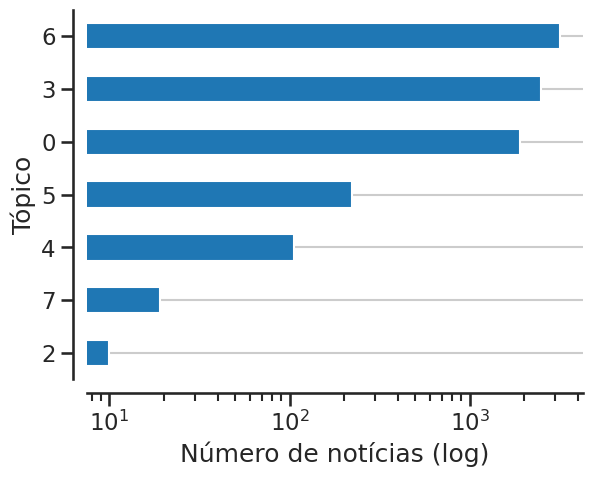

In [28]:
# Número de documentos vs tópicos

with sns.axes_style("ticks"):
    sns.set_context("talk")
    ax = news_2016['topic'].value_counts().sort_values().plot(kind='barh')
    ax.yaxis.grid(True)
    ax.set_ylabel("Tópico")
    ax.set_xlabel("Número de notícias (log)")
    sns.despine(offset=10)
    ax.set_xscale("log")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


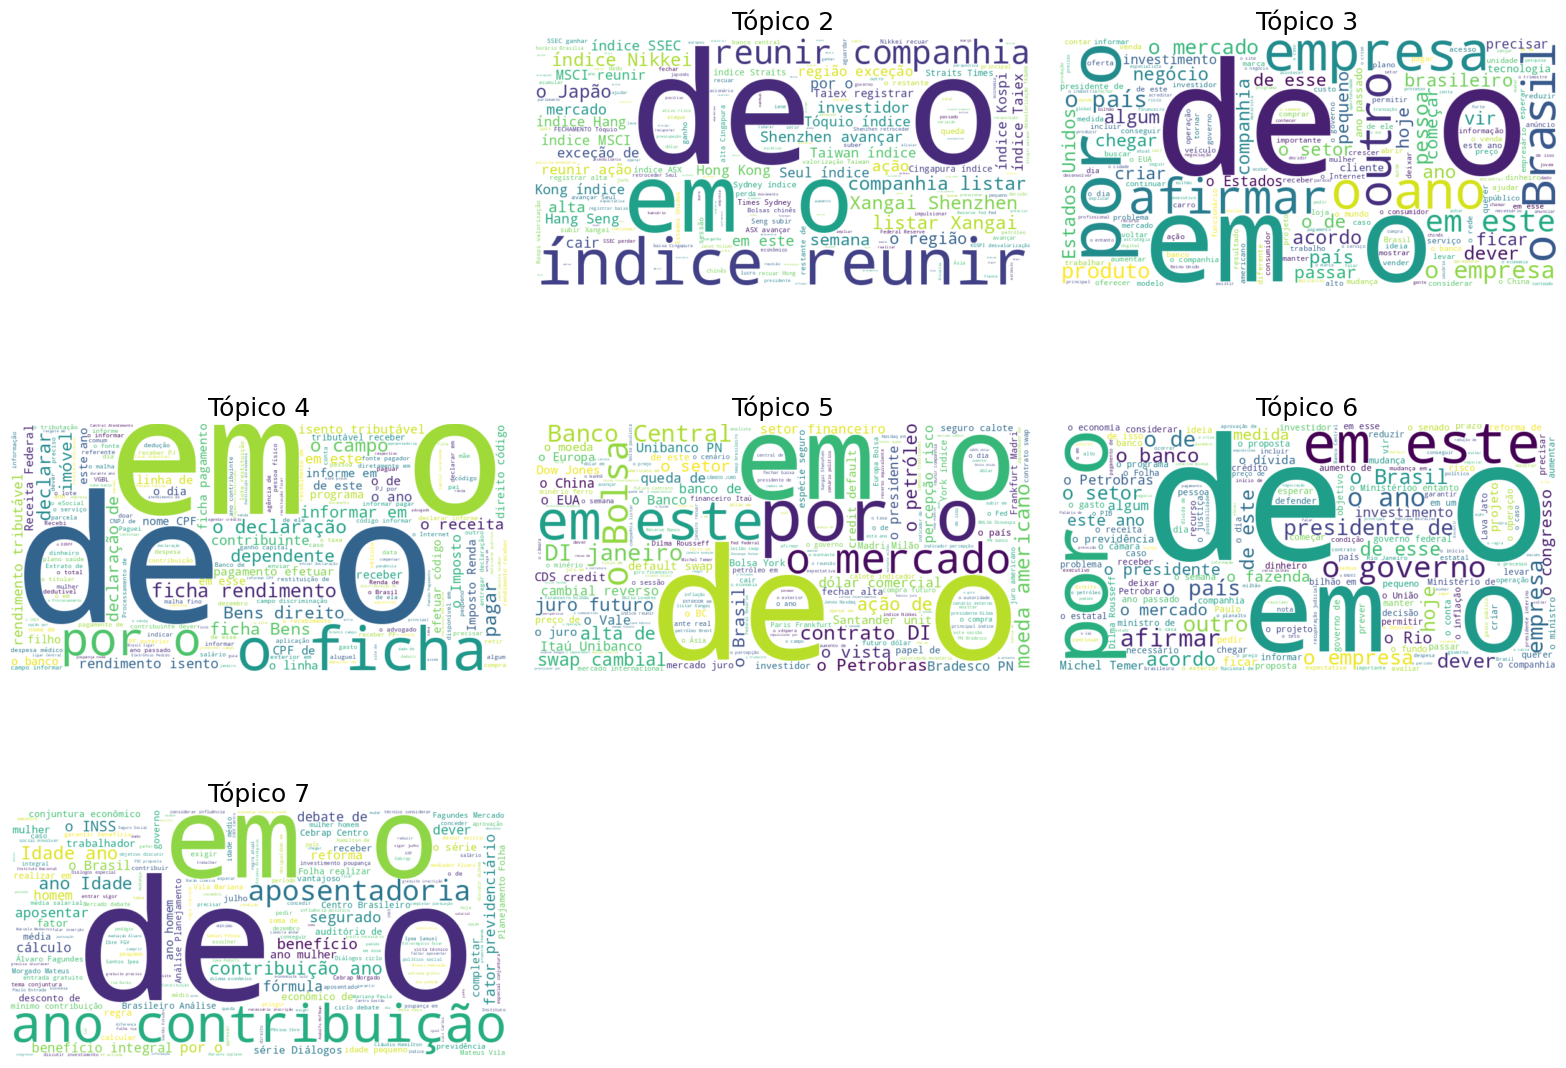

In [29]:


def plot_wordcloud(text: str, ax: plt.Axes) -> plt.Axes:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    return ax

def plot_wordcloud_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_words = chain(*topic_news.spacy_lemma.values.tolist())
    string_complete = ' '.join(list_of_words)
    if not string_complete:
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_for_a_topic(idx + 1, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}")
fig.tight_layout()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


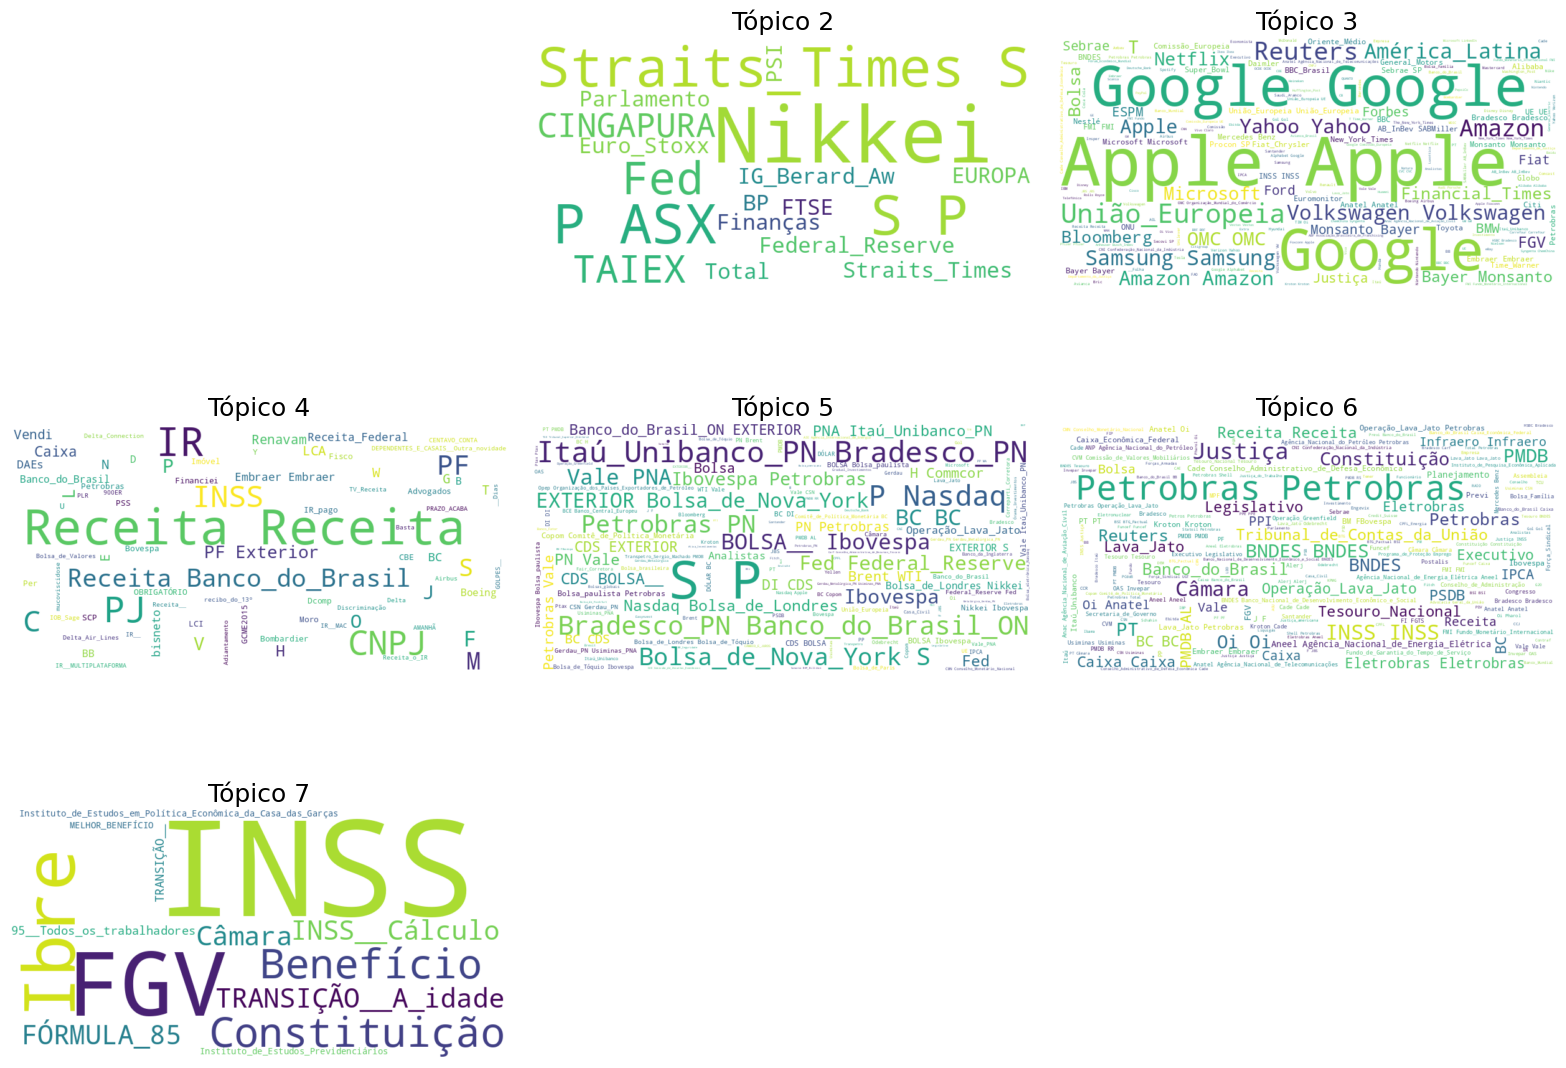

In [30]:
def plot_wordcloud_entities_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_docs = topic_news.spacy_ner.apply(lambda l : [w.replace(" ", "_") for w in l])
    list_of_words = chain(*list_of_docs)
    string_complete = ' '.join(list_of_words)
    if not len(string_complete):
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_entities_for_a_topic(idx + 1, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}")
fig.tight_layout()